# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{ Part 2 : Data Exploration}}$</center>


**Table of Contents**

* [Importing Libraries](#libraris)
* [Insights Exploration](#insights)
* [Data Visualisation and Exploaration](#viz)

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import plotly.graph_objects as go
import folium

import datetime 
import time

from scipy.stats import pearsonr
from scipy.stats import shapiro

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import LabelEncoder

<a id="insights"></a>

## ${\textbf{Insights Exploration}}$

In [2]:
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
Rainfall_Data = pd.read_pickle('./Pickles/Data/Rainfall_Data.pkl')
Piezometric_Data = pd.read_pickle('./Pickles/Data/Piezometric_Data.pkl')
RCP45 = pd.read_pickle('./Pickles/Data/RCP45.pkl')
RCP85 = pd.read_pickle('./Pickles/Data/RCP85.pkl')
RCP45Complete = pd.read_pickle('./Pickles/Data/RCP45Complete.pkl')
RCP85Complete = pd.read_pickle('./Pickles/Data/RCP85Complete.pkl')

>${\textbf{Data description}}$

In [3]:
Historical_Data.columns

Index(['Time_PZ', 'Piezometer', 'Pz', 'Time_RF', 'Pluviometer', 'RF',
       'YearlyRF', 'SemestrialRF', 'TrimestrialRF', 'MonthlyRF', 'Zone', 'SPI',
       'SPI_classes', 'Lat', 'Lon', 'Lat_Pluviometer', 'Lon_Pluviometer'],
      dtype='object')

###### Data: 
1 -​  Time_PZ​  (datetime) : Semestrially from 2005 to 2015 captured in April and September

2 -​ Piezometer​ (String): Device used to measure liquid pressure in a system by measuring the height to which a column of the liquid rises against gravity 

3 -​ Pz​ (Float): Piezometric level

4 -​  Time_RF​  (datetime) : Daily from 2005 to 2015 

5 -​ Pluviometer​ (String): Instrument used by meteorologists and hydrologists to gather and measure the amount of liquid precipitation over an area in a predefined area, over a period of time

6 -​ RF​ (Float): RainFall or Pulviometric Level 

7 -​ SemestrialRF​ (Float): Semestrial value of RainFall or Pulviometric Level 

8 -​ SPI​ (Float): Standardized Percipitation Index distinguishes dry and wet years

9 -​ SPI_classes​ (String): Classifies the SPI

10 -​ Semester​ (String): Information about the semester

11 -​ Lat​ (Floay): Latitude

12 -​ Lon​ (Floay): Longitude

>${\textbf{Head and tail}}$

In [4]:
Historical_Data.head()#5 first rows

Time_PZ      Piezometer      Pz    Time_RF   Pluviometer   RF  YearlyRF  \
0 2005-09-01  Puits Barrouta  53.433 2005-01-09  KHELIDIA CTV  0.0     204.2   
1 2005-09-01  Puits Barrouta  53.433 2005-02-09  KHELIDIA CTV  0.0     204.2   
2 2005-09-01  Puits Barrouta  53.433 2005-03-09  KHELIDIA CTV  0.0     204.2   
3 2005-09-01  Puits Barrouta  53.433 2005-04-09  KHELIDIA CTV  0.0     204.2   
4 2005-09-01  Puits Barrouta  53.433 2005-05-09  KHELIDIA CTV  0.0     204.2   

   SemestrialRF  TrimestrialRF  MonthlyRF  Zone       SPI     SPI_classes  \
0         204.2           28.1       28.1     1 -0.236898  Moderately dry   
1         204.2           28.1       28.1     1 -0.236898  Moderately dry   
2         204.2           28.1       28.1     1 -0.236898  Moderately dry   
3         204.2           28.1       28.1     1 -0.236898  Moderately dry   
4         204.2           28.1       28.1     1 -0.236898  Moderately dry   

         Lat        Lon  Lat_Pluviometer  Lon_Pluviometer  
0  36.620943  10.179025         36.63694        -10.19417  
1  36.620943  10.179025         36.63694        -10.19417  
2  36.620943  10.179025         36.63694        -10.19417  
3  36.620943  10.179025         36.63694        -10.19417  
4  36.620943  10.179025         36.63694        -10.19417

In [5]:
Historical_Data.tail()#5 last rows

Time_PZ       Piezometer         Pz    Time_RF Pluviometer   RF  \
285475 2015-09-01  UCP Errissala_B  44.770923 2015-08-27  MORNEG CTV  0.0   
285476 2015-09-01  UCP Errissala_B  44.770923 2015-08-28  MORNEG CTV  0.0   
285477 2015-09-01  UCP Errissala_B  44.770923 2015-08-29  MORNEG CTV  0.0   
285478 2015-09-01  UCP Errissala_B  44.770923 2015-08-30  MORNEG CTV  0.0   
285479 2015-09-01  UCP Errissala_B  44.770923 2015-08-31  MORNEG CTV  0.0   

        YearlyRF  SemestrialRF  TrimestrialRF  MonthlyRF  Zone       SPI  \
285475     294.3          38.5           38.5       38.5     2 -0.236898   
285476     294.3          38.5           38.5       38.5     2 -0.236898   
285477     294.3          38.5           38.5       38.5     2 -0.236898   
285478     294.3          38.5           38.5       38.5     2 -0.236898   
285479     294.3          38.5           38.5       38.5     2 -0.236898   

           SPI_classes        Lat        Lon  Lat_Pluviometer  Lon_Pluviometer  
285475  Moderately dry  36.657951  10.324284         36.59389        -10.30222  
285476  Moderately dry  36.657951  10.324284         36.59389        -10.30222  
285477  Moderately dry  36.657951  10.324284         36.59389        -10.30222  
285478  Moderately dry  36.657951  10.324284         36.59389        -10.30222  
285479  Moderately dry  36.657951  10.324284         36.59389        -10.30222

>${\textbf{Info and shape}}$

In [6]:
Historical_Data.info()#Dataset information about types and columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285480 entries, 0 to 285479
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Time_PZ          285480 non-null  datetime64[ns]
 1   Piezometer       285480 non-null  object        
 2   Pz               285480 non-null  float64       
 3   Time_RF          285480 non-null  datetime64[ns]
 4   Pluviometer      285480 non-null  object        
 5   RF               285480 non-null  float64       
 6   YearlyRF         285480 non-null  float64       
 7   SemestrialRF     285480 non-null  float64       
 8   TrimestrialRF    285480 non-null  float64       
 9   MonthlyRF        285480 non-null  float64       
 10  Zone             285480 non-null  int64         
 11  SPI              285480 non-null  float64       
 12  SPI_classes      285480 non-null  object        
 13  Lat              285480 non-null  float64       
 14  Lon              285

In [7]:
Historical_Data.shape#Shape of the data

(285480, 17)

>${\textbf{Feature study}}$

In [8]:
print(Historical_Data['Piezometer'].unique())#Unique piezometers /wells /stations
print(len(Historical_Data['Piezometer'].unique()))#Number of piezometers

['Puits Barrouta' 'Ben Saad' 'Ecole de Police' 'UCP Ouzra' 'Salah Khamar'
 'Haj Hadi Jani' 'Azaiz ben Attia' 'Delagi' 'Ben Zazia' 'Fraj'
 'Bir El Kif' 'El Attar' 'Majoul' 'Puits Public_5779' 'Ben Khalifa'
 'Usine Curamique' 'Mohamed Boutnini' 'INAT Zaouia' 'Ali El Almi'
 'Bel Hassen Sahli' 'Azzouz El Bahri 1' 'Haj Meftah Allagui'
 'Salah Meziene' 'UCP Sidi Daoud' 'Hamadi Belarbi' 'UCP Ennajah_484'
 'UCP Ennajah_494' 'Ali et Med Bel Arbi' 'UCP Errissala_620' 'Puit OTD'
 'Sadok Belaid' 'Huritier Sgaier' 'Puits Public_3292' 'B. Abdallah'
 'Puits public_6582' 'Mohamed ben Rouis' 'Ali Hanzouti' 'Hachmi Allagui'
 'G.O.V.P.F' 'Mzabi' 'Naceur Dababi' 'INRAT' 'Mohamed Ben Nouiji'
 'UCP Errissala_B']
44


In [9]:
print(Historical_Data['Pluviometer'].unique())#Unique pluviometers
print(len(Historical_Data['Pluviometer'].unique()))#Number of pluviometers

['KHELIDIA CTV' 'KHELIDIA POMPAGE' 'MHAMEDIA DISPENSAIRE'
 'OUDHNA FERME CHIBOUB' 'OUZRA AGRI FLORA' 'BEN AROUS I MUNICIPA'
 'BOUMHEL BASSATINE MU' 'EZZAHRA' 'HAMMEM LIF' 'MEGRINE PARC CRDA'
 'RADES OUAFA' 'RADES PF' 'FOUCHANA FERME GAMOU' 'MORNEG FERME ESSADIR'
 'CRETEVILLE' 'DOMAINE DECHAMUNE' 'MORNAG SIDI ZEYED' 'MORNEG CTV']
18


In [10]:
print(Historical_Data['SPI_classes'].unique())#Unique SPI classes
print(len(Historical_Data['SPI_classes'].unique()))#Number of SPI classes available

['Moderately dry' 'Moderately Wet' 'Extremely wet' 'Very wet']
4


In [11]:
print(Historical_Data['Zone'].unique())#Unique Zones
print(len(Historical_Data['Zone'].unique()))#Number of zones available

[1 4 3 2]
4


In [12]:
print("Max : ",Historical_Data['Pz'].max())#Max Piezometric level
print("Min : ",Historical_Data['Pz'].min())#Min Piezometric level
print("Mean: ",Historical_Data['Pz'].mean())#Mean Piezometric level

Max :  53.57299999999999
Min :  -15.272307692307695
Mean:  15.070446219834071


In [13]:
print("Max : ",Historical_Data['RF'].max())#Max Rainfall level
print("Min : ",Historical_Data['RF'].min())#Min Rainfall level
print("Mean: ",Historical_Data['RF'].mean())#Mean Rainfall level

Max :  101.0
Min :  0.0
Mean:  0.6647662974746257


In [14]:
print("Max : ",Historical_Data['MonthlyRF'].max())#Max Semestrial Rainfall level
print("Min : ",Historical_Data['MonthlyRF'].min())#Min Semestrial Rainfall level
print("Mean: ",Historical_Data['MonthlyRF'].mean())#Mean Semestrial Rainfall level

Max :  307.0
Min :  0.0
Mean:  20.124764522224332


In [15]:
print("Max : ",Historical_Data['TrimestrialRF'].max())#Max Semestrial Rainfall level
print("Min : ",Historical_Data['TrimestrialRF'].min())#Min Semestrial Rainfall level
print("Mean: ",Historical_Data['TrimestrialRF'].mean())#Mean Semestrial Rainfall level

Max :  307.0
Min :  0.0
Mean:  59.12696989473823


In [16]:
print("Max : ",Historical_Data['SemestrialRF'].max())#Max Semestrial Rainfall level
print("Min : ",Historical_Data['SemestrialRF'].min())#Min Semestrial Rainfall level
print("Mean: ",Historical_Data['SemestrialRF'].mean())#Mean Semestrial Rainfall level

Max :  742.0
Min :  12.600000381469727
Mean:  222.5884643243397


In [17]:
print("Max : ",Historical_Data['YearlyRF'].max())#Max Semestrial Rainfall level
print("Min : ",Historical_Data['YearlyRF'].min())#Min Semestrial Rainfall level
print("Mean: ",Historical_Data['YearlyRF'].mean())#Mean Semestrial Rainfall level

Max :  936.0
Min :  126.29999995976686
Mean:  439.0915970514452


In [18]:
print("Max : ",RCP45['MonthlyRF'].max())
print("Min : ",RCP45['MonthlyRF'].min())
print("Mean: ",RCP45['MonthlyRF'].mean())

Max :  113.29179503290388
Min :  0.0
Mean:  27.444570822984545


In [19]:
print("Max : ",RCP45['TrimestrialRF'].max())
print("Min : ",RCP45['TrimestrialRF'].min())
print("Mean: ",RCP45['TrimestrialRF'].mean())

Max :  212.08818181818182
Min :  20.698181818181816
Mean:  95.99762354494834


In [20]:
print("Max : ",RCP45['SemestrialRF'].max())
print("Min : ",RCP45['SemestrialRF'].min())
print("Mean: ",RCP45['SemestrialRF'].mean())

Max :  308.6872727272727
Min :  98.87
Mean:  191.99524708981752


In [21]:
print("Max : ",RCP45['YearlyRF'].max())
print("Min : ",RCP45['YearlyRF'].min())
print("Mean: ",RCP45['YearlyRF'].mean())

Max :  529.1381818181817
Min :  274.05727272727273
Mean:  383.9904941796417


In [22]:
print("Max : ",RCP45['Mean'].max())
print("Min : ",RCP45['Mean'].min())
print("Mean: ",RCP45['Mean'].mean())

Max :  99.7909090909091
Min :  0.9590909090909091
Mean:  31.999207848312004


In [23]:
print("Max : ",RCP85['MonthlyRF'].max())
print("Min : ",RCP85['MonthlyRF'].min())
print("Mean: ",RCP85['MonthlyRF'].mean())

Max :  111.68592855938047
Min :  0.0
Mean:  29.166820685608197


In [24]:
print("Max : ",RCP85['TrimestrialRF'].max())
print("Min : ",RCP85['TrimestrialRF'].min())
print("Mean: ",RCP85['TrimestrialRF'].mean())

Max :  213.8390909090909
Min :  22.10272727272727
Mean:  92.25711199126926


In [25]:
print("Max : ",RCP85['SemestrialRF'].max())
print("Min : ",RCP85['SemestrialRF'].min())
print("Mean: ",RCP85['SemestrialRF'].mean())

Max :  335.3963636363636
Min :  95.32
Mean:  184.5142239824943


In [26]:
print("Max : ",RCP85['YearlyRF'].max())
print("Min : ",RCP85['YearlyRF'].min())
print("Mean: ",RCP85['YearlyRF'].mean())

Max :  552.4536363636364
Min :  255.4827272727273
Mean:  369.0284479650668


In [27]:
print("Max : ",RCP85['Mean'].max())
print("Min : ",RCP85['Mean'].min())
print("Mean: ",RCP85['Mean'].mean())

Max :  102.5690909090909
Min :  0.5127272727272728
Mean:  30.75237066375602


>${\textbf{Stationarity study}}$

A stationary time series is one whose properties do not depend on the time at which the series is observed.Thus, time series with trends, or with seasonality, are not stationary. <Br> Knowing that the trend and seasonality will affect the value of the time series at different times.
<img src="./Images/stationery.jpg" width="800" height="400">

    

In [28]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    '''
    Calculates statistical values whether the available data are stationary or not 
    
    Args:
        series (float64): Values of the column for which stationarity is to be checked, numpy array of floats 
        column_name (str): Name of the column for which stationarity is to be checked
    
    Returns:
        p-value that indicates whether the data are stationary or not
    ''' 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [29]:
df=Piezometric_Data.copy()
for name, column in df[['Pz']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Pz
Test Statistic                   -4.773120
p-value                           0.000061
No Lags Used                      2.000000
Number of Observations Used    1097.000000
Critical Value (1%)              -3.436325
Critical Value (5%)              -2.864178
Critical Value (10%)             -2.568175
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




In [30]:
df=Rainfall_Data.copy()
for name, column in df[['RF']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: RF
Test Statistic                   -27.547486
p-value                            0.000000
No Lags Used                      59.000000
Number of Observations Used    65676.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566793
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




In [31]:
df=Rainfall_Data.copy()
for name, column in df[['MonthlyRF']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: MonthlyRF
Test Statistic                   -25.783212
p-value                            0.000000
No Lags Used                      61.000000
Number of Observations Used    65674.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566793
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




In [32]:
df=Rainfall_Data.copy()
for name, column in df[['TrimestrialRF']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: TrimestrialRF
Test Statistic                   -23.479217
p-value                            0.000000
No Lags Used                      61.000000
Number of Observations Used    65674.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566793
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




In [33]:
df=Rainfall_Data.copy()
for name, column in df[['SemestrialRF']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: SemestrialRF
Test Statistic                -1.454830e+01
p-value                        5.014685e-27
No Lags Used                   0.000000e+00
Number of Observations Used    6.573500e+04
Critical Value (1%)           -3.430449e+00
Critical Value (5%)           -2.861584e+00
Critical Value (10%)          -2.566793e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




In [34]:
df=Rainfall_Data.copy()
for name, column in df[['YearlyRF']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: YearlyRF
Test Statistic                -1.076971e+01
p-value                        2.401619e-19
No Lags Used                   0.000000e+00
Number of Observations Used    6.573500e+04
Critical Value (1%)           -3.430449e+00
Critical Value (5%)           -2.861584e+00
Critical Value (10%)          -2.566793e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




>${\textbf{Cointegration study}}$

A cointegration test is used to establish if there is a correlation between several time series in the long term.
It identifies scenarios where two or more non-stationary time series are integrated together in a way that they cannot deviate from equilibrium in the long term. The tests are used to identify the degree of sensitivity of two variables to the same average price over a specified period of time.

In [35]:
def cointegration_test(df): 
    '''
    Test if there is a long-run relationship between features
    
    Args:
        dataframe (float64): Values of the columns to be checked, numpy array of floats 
    
    Returns:
        True or False whether a variable has a long-run relationship between other features
    ''' 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [36]:
df=Historical_Data[['Pz','RF','YearlyRF','SemestrialRF','TrimestrialRF','MonthlyRF','Zone','SPI']].copy()
cointegration_test(df)

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Pz     >  66443.53  > 143.6691  =>   True
RF     >  11946.74  > 111.7797  =>   True
YearlyRF >  3574.64   > 83.9383   =>   True
SemestrialRF >  908.11    > 60.0627   =>   True
TrimestrialRF >  509.22    > 40.1749   =>   True
MonthlyRF >  207.51    > 24.2761   =>   True
Zone   >  38.37     > 12.3212   =>   True
SPI    >  0.08      > 4.1296    =>   False


>${\textbf{Correlation study}}$

Correlation is a statistical measure that expresses the extent to which two variables are linearly related.

In [37]:
df=Historical_Data.copy()
column=['Time_PZ','Time_RF','Piezometer','Pluviometer','RF','YearlyRF','SemestrialRF','TrimestrialRF','MonthlyRF','Zone','SPI','SPI_classes','Lat','Lon','Lat_Pluviometer','Lon_Pluviometer','Pz']#Reindexing
df=df.reindex(column, axis='columns')
lb_make = LabelEncoder()
df["SPI_classes"] = lb_make.fit_transform(df["SPI_classes"])

In [38]:
features = df.iloc[:,4:11].columns.tolist()
target = df.Pz.name

In [39]:
correlations = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [40]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

Value
Zone vs Pz          -0.646929
YearlyRF vs Pz       0.076945
SemestrialRF vs Pz   0.064456
TrimestrialRF vs Pz -0.003177
MonthlyRF vs Pz     -0.003119
SPI vs Pz           -0.000785
RF vs Pz            -0.000785

* Latitude is a strong predictor of temperature which is relevant and dependant to the piezometric levels
* As each zone have its own soil characteristics it's normal that the groundwater level is dependant of the zone

<a id="viz"></a>

## ${\textbf{Data Visualisation and Exploaration}}$

<img src="./Images/zones.jpg" width="800" height="400">

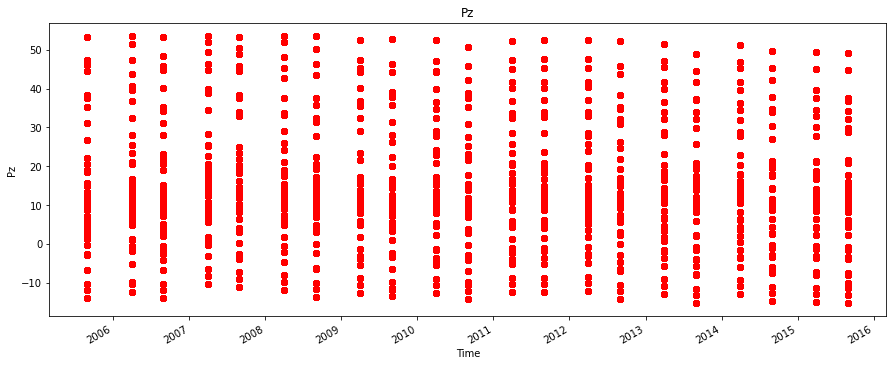

In [41]:
df=Historical_Data.copy()
df.index=df.Time_PZ
df[str('Pz')].plot(figsize=(15, 6),marker='o', linestyle='',color='r')
plt.xlabel("Time")
plt.ylabel('Pz')
plt.title(f"{str('Pz')}")
plt.show()

In [42]:
df=Piezometric_Data.copy()
df.index=df.Time
fig = go.Figure()
fig.add_trace(go.Scatter(y=df.Pz, mode="lines"))
fig.show()


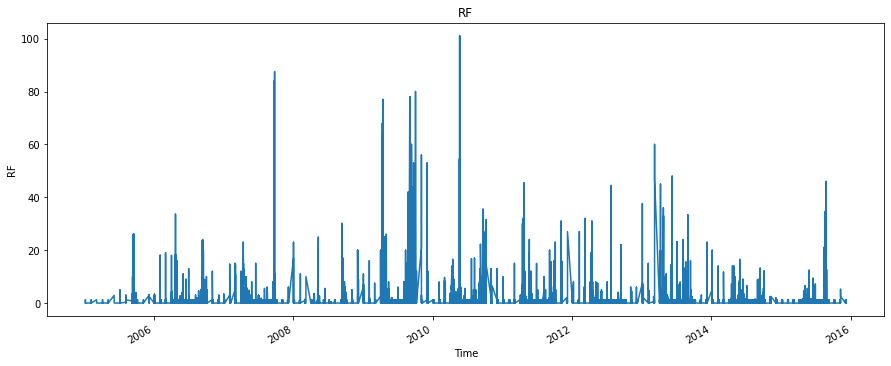

In [43]:
df=Historical_Data.copy()
df.index=df.Time_RF
df[str('RF')].plot(figsize=(15, 6))
plt.xlabel("Time")
plt.ylabel('RF')
plt.title(f"{str('RF')}")
plt.show()

In [44]:
def plot_scatter(data, x, y):
        """
        Plot a scatter plot to show relationship/correlation in x and y
        x : continuous feature
        y_axis : continous feature

        return : barplot and a boxplot that is hued by dayofweek
        """
        plt.figure(figsize=(20, 9))
        sns.scatterplot(data=data, x=x, y=y, hue='SPI_classes')
        plt.title(f'Relationship of {y} and {x} separated by SPI Classes', size=35, fontweight='bold'); 
        plt.yticks(fontsize=20); plt.xticks(fontsize=20)    
        plt.ylabel(f'{y}', fontsize=24);    plt.xlabel(f'{x}', fontsize=24)
        plt.legend(bbox_to_anchor=(1, 1.02), fontsize=20)
        plt.show()

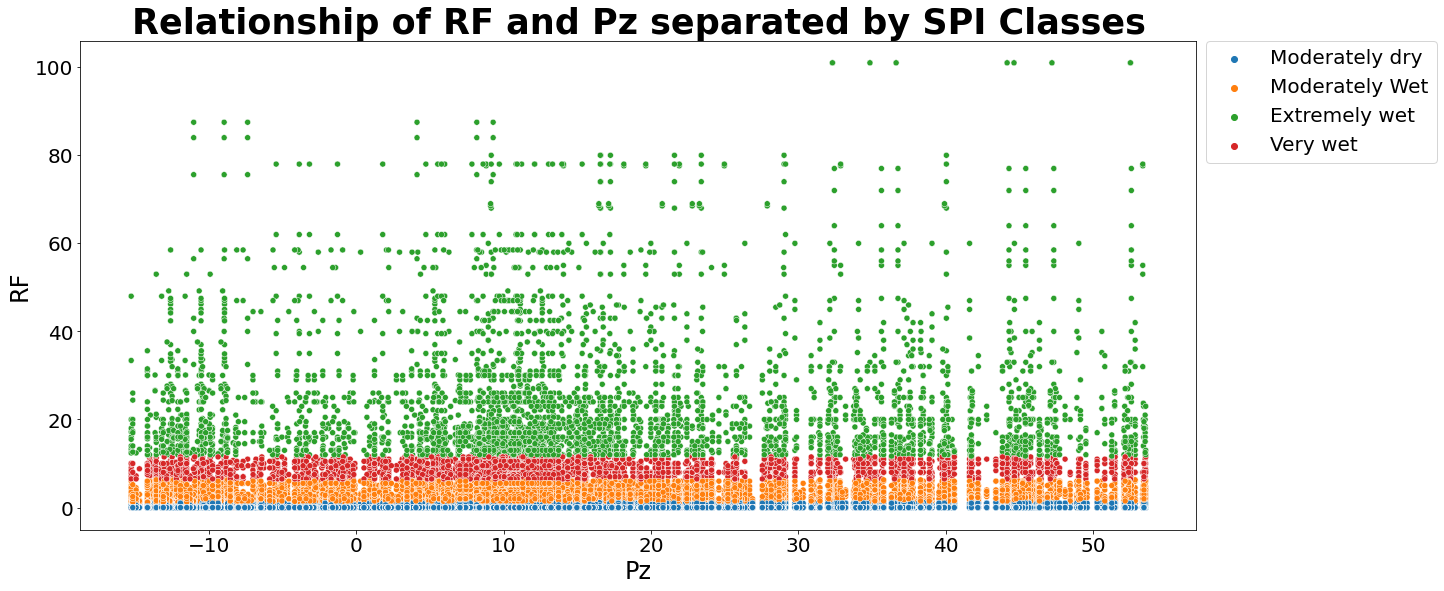

In [45]:
df=Historical_Data.copy()
plot_scatter(df,'Pz','RF')

>${\textbf{Pizometric Level Plots}}$

In [46]:
df=Piezometric_Data.copy()
df['Piezometer'].nunique()
list_nom = list(set(df['Piezometer']))
list_YM= [d.strftime('%y-%m') for d in df.Time]
list_Year= [d.year for d in df.Time]
list_Month= [d.strftime('%b') for d in df.Time]
df['YM'] = list_YM
df['Year'] = list_Year
df['Month'] = list_Month

#create a monthly dataframe
df_monthly = df.groupby(['Piezometer','Zone','YM','Year','Month']).mean()
df_monthly = df_monthly[['Pz']].reset_index()


>>${\textbf{Multiple time series plots}}$

In [47]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_nom)).as_hex())

fig = go.Figure()
for d,p in zip(list_nom, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['Piezometer']==d]['YM'],
                             y = df_monthly[df_monthly['Piezometer']==d]['Pz'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 
fig.show()

 >>${\textbf{Heat Map}}$

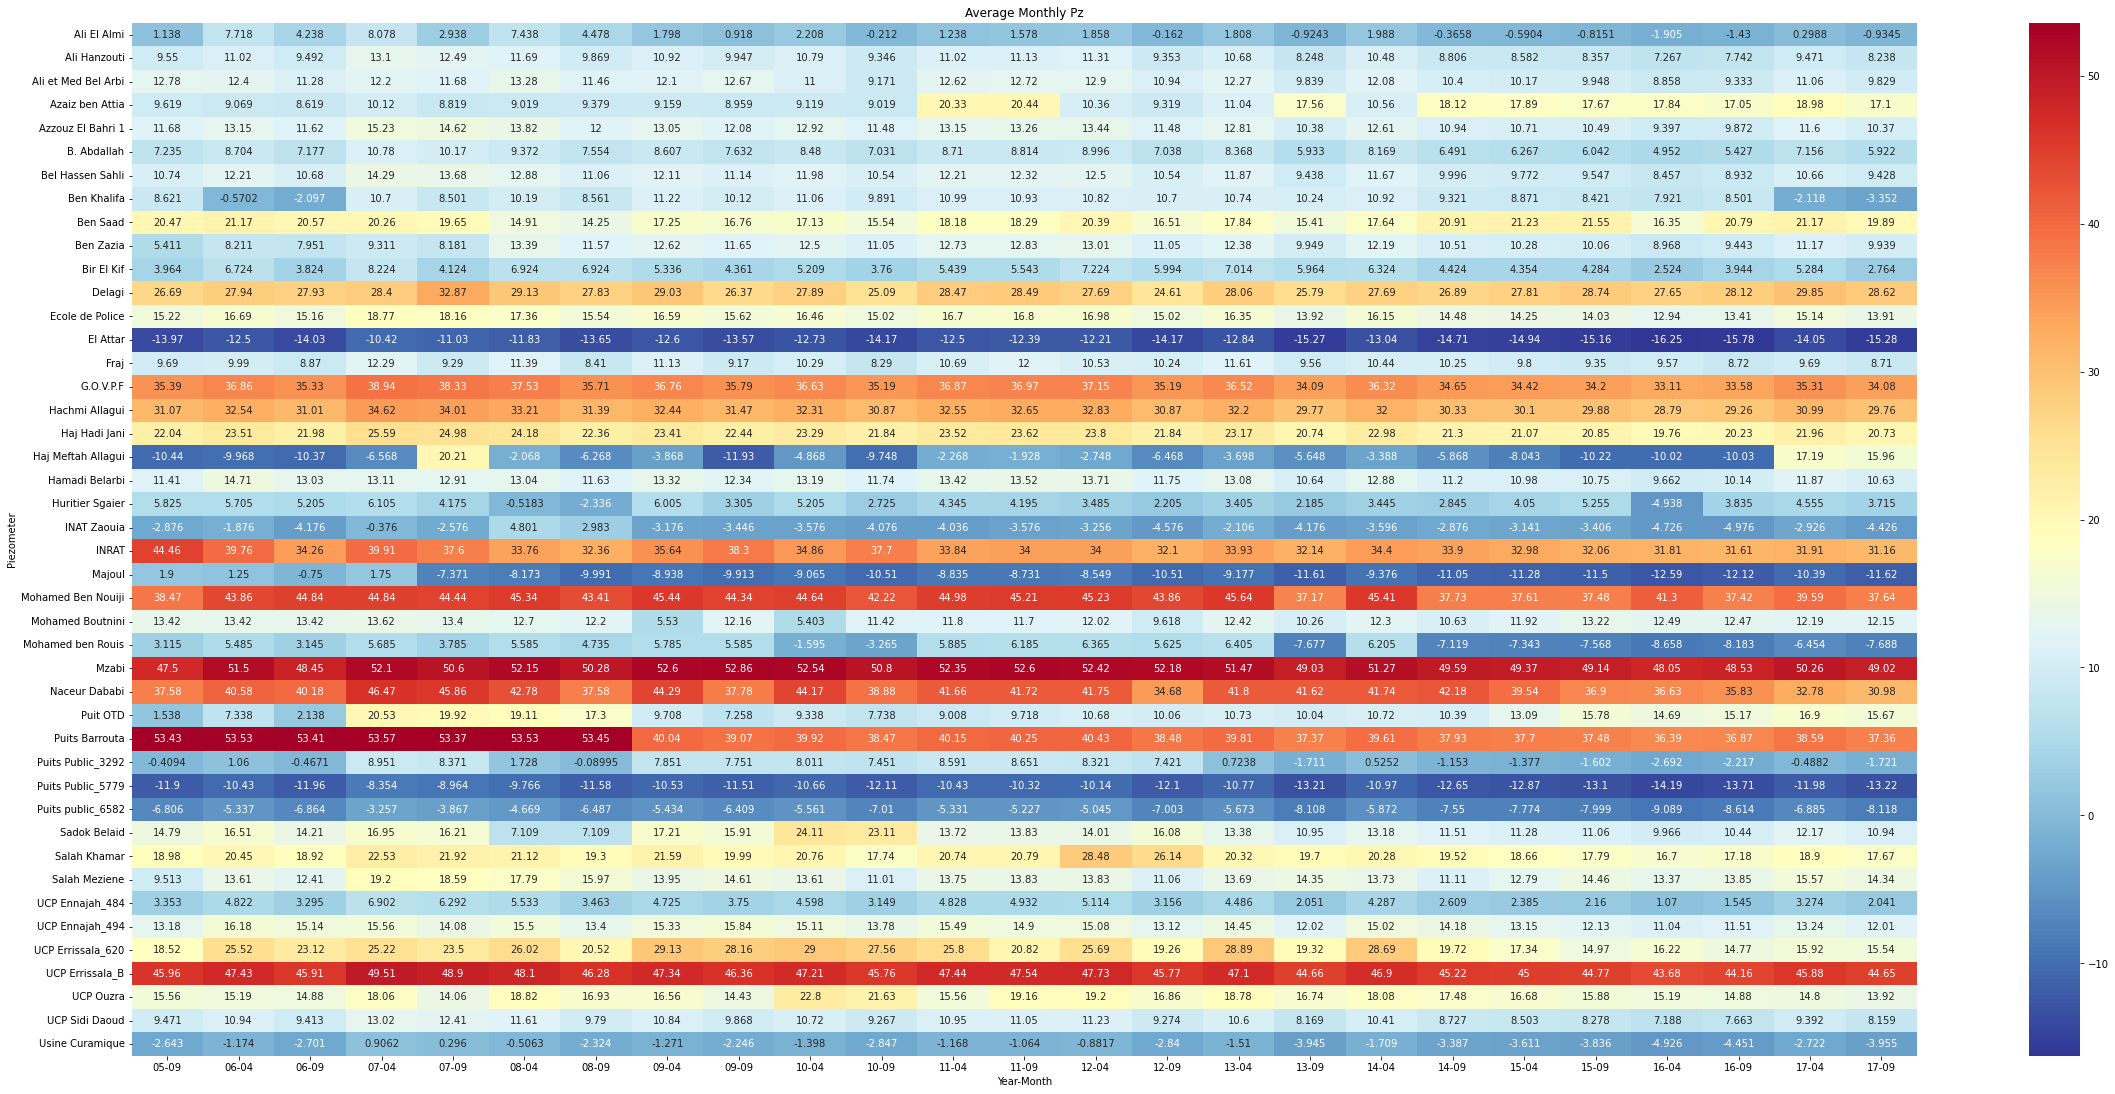

In [48]:
df_pivot = pd.pivot_table(df_monthly,
                          values='Pz',
                          index='Piezometer',
                          columns='YM')
plt.figure(figsize = (40,19))
plt.title('Average Monthly Pz')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Year-Month')
plt.ylabel('Piezometer')
plt.show()

 >>${\textbf{BoxPlots}}$

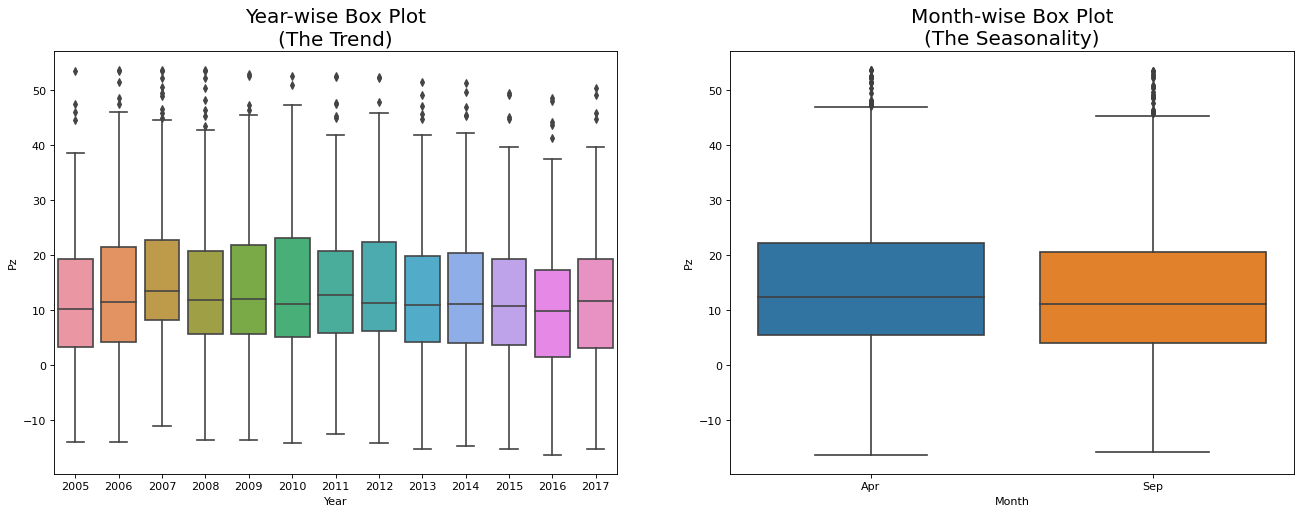

In [49]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Pz', data=df, ax=axes[0])
sns.boxplot(x='Month', y='Pz', data=df.loc[~df.Year.isin([2005, 2015]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

 >>${\textbf{ACF}}$

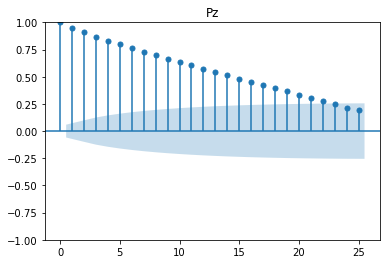

In [50]:
plot_acf(df["Pz"],lags=25,title="Pz")
plt.show()

 >>${\textbf{Partial ACF}}$

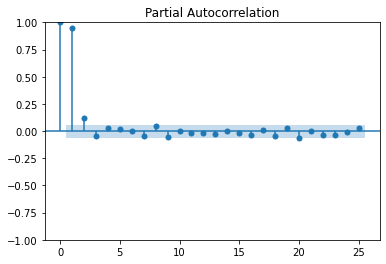

In [51]:
plot_pacf(df["Pz"],lags=25)
plt.show()

>${\textbf{Pulviometric levels plots}}$

In [52]:
df=Rainfall_Data.copy()
df['Pluviometer'].nunique()
list_nom = list(set(df['Pluviometer']))
list_YM= [d.strftime('%y-%m') for d in df.Time]
list_Year= [d.year for d in df.Time]
list_Month= [d.strftime('%b') for d in df.Time]
df['YM'] = list_YM
df['Year'] = list_Year
df['Month'] = list_Month

#create a monthly dataframe
df_monthly = df.groupby(['Pluviometer','Zone','YM','Year','Month']).mean()
df_monthly = df_monthly[['RF']].reset_index()


>>${\textbf{Multiple time series plots}}$

In [53]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_nom)).as_hex())

fig = go.Figure()
for d,p in zip(list_nom, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['Pluviometer']==d]['YM'],
                             y = df_monthly[df_monthly['Pluviometer']==d]['RF'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 
fig.show()

 >>${\textbf{ACF}}$

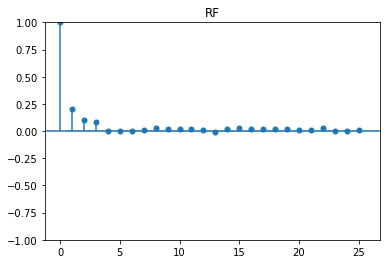

In [54]:
plot_acf(df["RF"],lags=25,title="RF")
plt.show()

 >>${\textbf{Partial ACF}}$

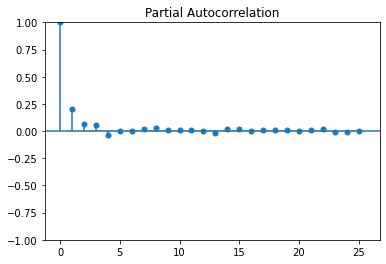

In [55]:
plot_pacf(df["RF"],lags=25)
plt.show()

In [57]:
#extract color palette, the palette can be changed
list_nom = ['MIROC-ESM', 'CNRM-CM5', 'CanESM2', 'FGOALS-s2', 'BNU-ESM',
       'MIROC5', 'GFDL-ESM2G', 'MIROC-ESM-CHEM', 'GFDL-ESM2M', 'MRI-CGCM3',
       'MRI-CGCM3.1','MonthlyRF','Mean']
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_nom)).as_hex())

fig = go.Figure()
for d,p in zip(list_nom, pal):
    fig.add_trace(go.Scatter(x = RCP45Complete.index,
                             y = RCP45Complete[d],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 
fig.show()

In [58]:
#extract color palette, the palette can be changed
list_nom = ['MIROC-ESM', 'CNRM-CM5', 'CanESM2', 'FGOALS-s2', 'BNU-ESM',
       'MIROC5', 'GFDL-ESM2G', 'MIROC-ESM-CHEM', 'GFDL-ESM2M', 'MRI-CGCM3',
       'bcc-csm1-1','MonthlyRF','Mean']
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_nom)).as_hex())

fig = go.Figure()
for d,p in zip(list_nom, pal):
    fig.add_trace(go.Scatter(x = RCP85Complete.index,
                             y = RCP85Complete[d],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 
fig.show()